In [1]:
from scripts.ClusterTS_MDS import ClusterVTECDataMDS
from numpy import loadtxt, float64

%matplotlib inline

In [2]:
PTEX_dissim = loadtxt("./data/PTEX_DTW_matrix.dat", dtype= float64, delimiter = ",")

In [3]:
list_dimensions = list(range(1, 7))
list_clusters = list(range(2, 11))
list_clust_methods = ["K-Means", "Gaussian"]

TEC_ClusterSeries = ClusterVTECDataMDS(dissimilarity = PTEX_dissim)

In [4]:
from matplotlib.pyplot import subplots, show

def VisualizeClusterMetrics(metrics_by_method):
    Figure, Subplot = subplots(3, 1, sharex="all", figsize = (7, 7))

    for cluster_method, metrics_results in metrics_by_method.items():
        num_clusters, metrics = zip(*metrics_results)
        SH, CH, DB = zip(*metrics)

        Subplot[0].plot(num_clusters, SH, "-o", label = cluster_method)
        Subplot[1].plot(num_clusters, CH, "-o", label = cluster_method)
        Subplot[2].plot(num_clusters, DB, "-o", label = cluster_method)

    Subplot[0].legend()
    Subplot[1].legend()
    Subplot[2].legend()

    Subplot[2].set_xlabel("# of clusters")
    Subplot[0].set_ylabel("Silhouette Coefficient")
    Subplot[1].set_ylabel("Calinski-Harabasz Index")
    Subplot[2].set_ylabel("Davies-Bouldin Index")

    Figure.tight_layout()

    show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def GetClusteringMetrics(Xc, num_clusters, cluster_method = "K-Means"):
    if cluster_method == "K-Means":
        KMeans_Cluster_TS = KMeans(n_clusters = num_clusters, init = "k-means++")
        Labels = KMeans_Cluster_TS.fit_predict(Xc)
        
    elif cluster_method == "Gaussian":
        GaussianMix_Cluster_TS = GaussianMixture(n_components = num_clusters, covariance_type = "full")
        Labels = GaussianMix_Cluster_TS.fit_predict(Xc)

    SH_score_Xc = silhouette_score(Xc, Labels)
    CH_score_Xc = calinski_harabasz_score(Xc, Labels)
    DB_score_Xc = davies_bouldin_score(Xc, Labels)

    return (SH_score_Xc, CH_score_Xc, DB_score_Xc)


### MDS clasico

Classic with 1 components has a stress value of 0.383302


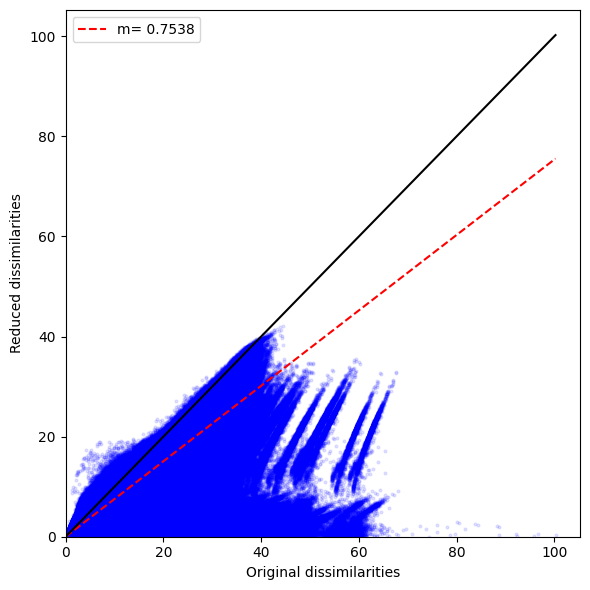

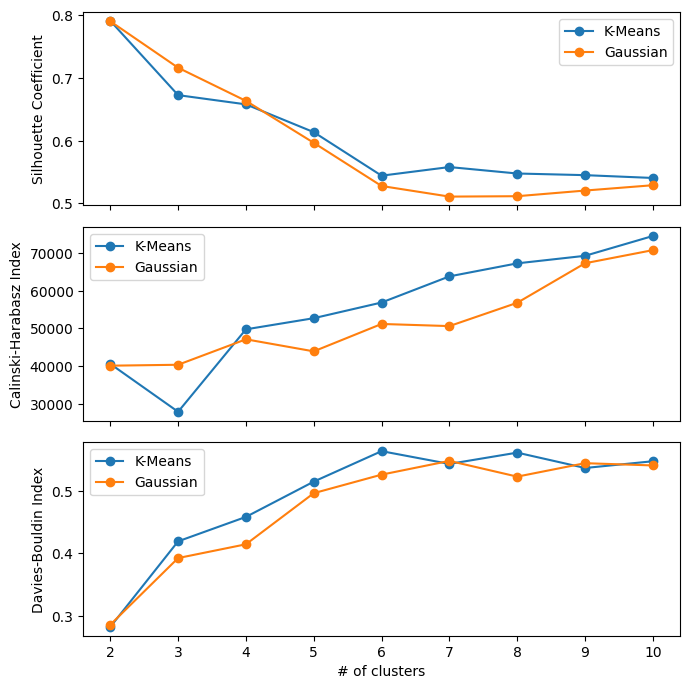

Classic with 2 components has a stress value of 0.267437


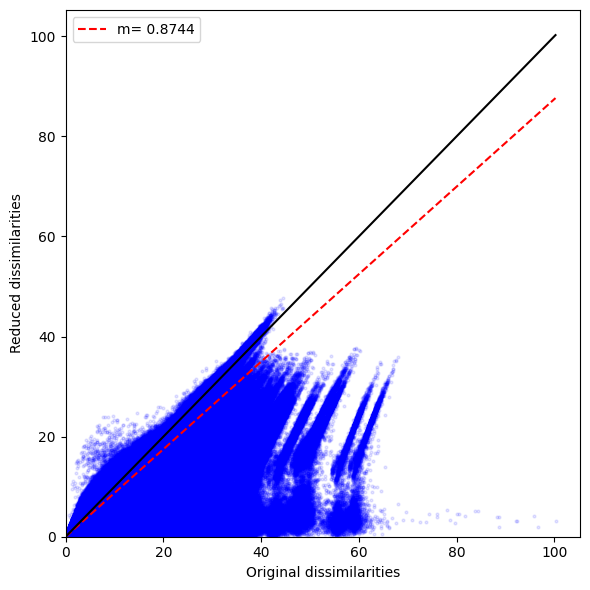

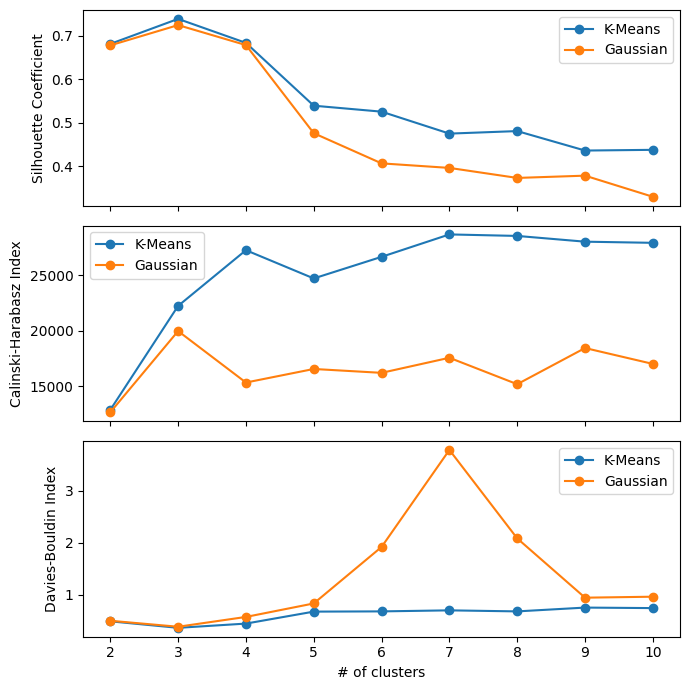

Classic with 3 components has a stress value of 0.192458


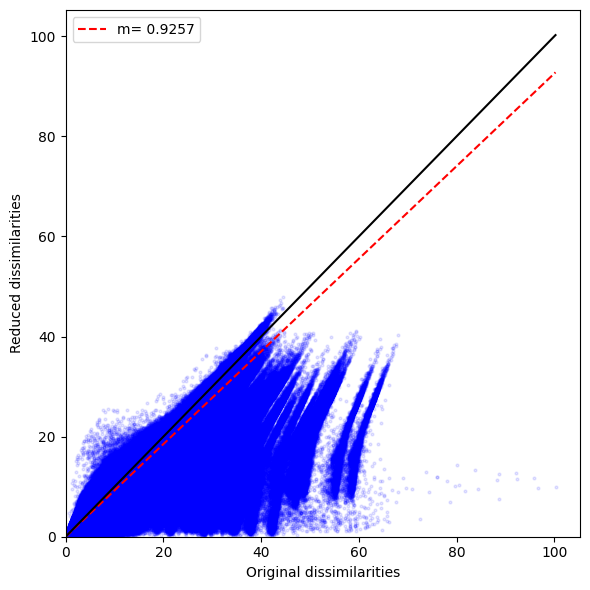

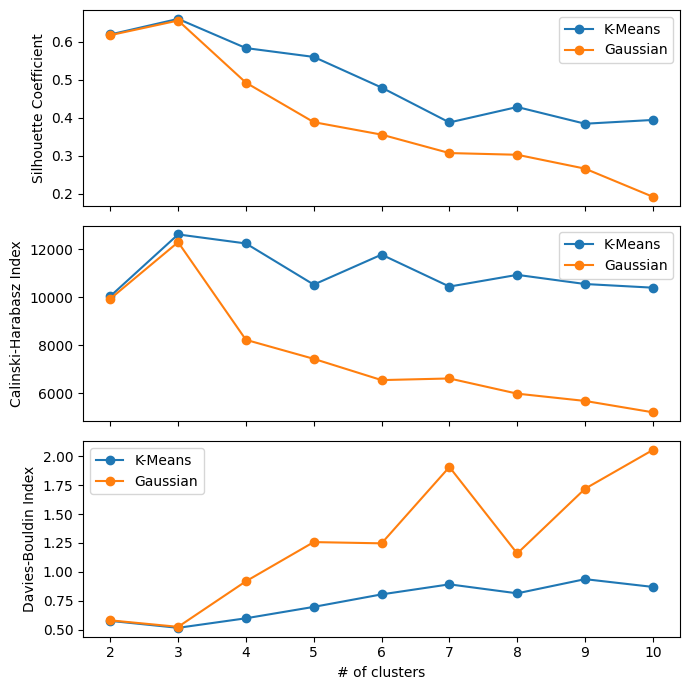

Classic with 4 components has a stress value of 0.142699


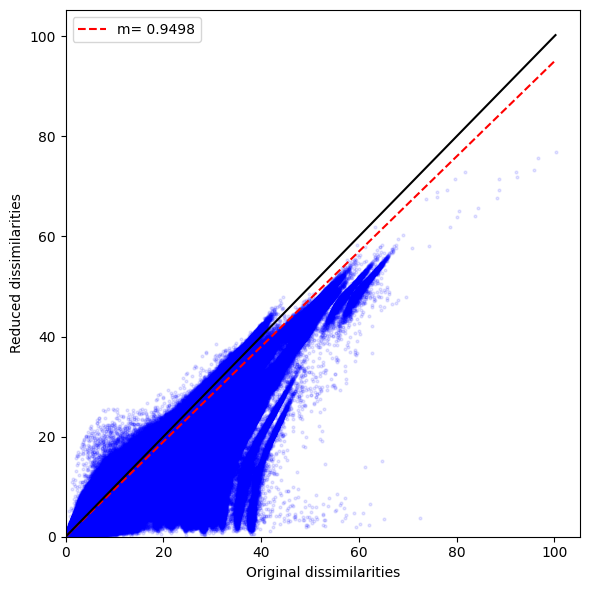

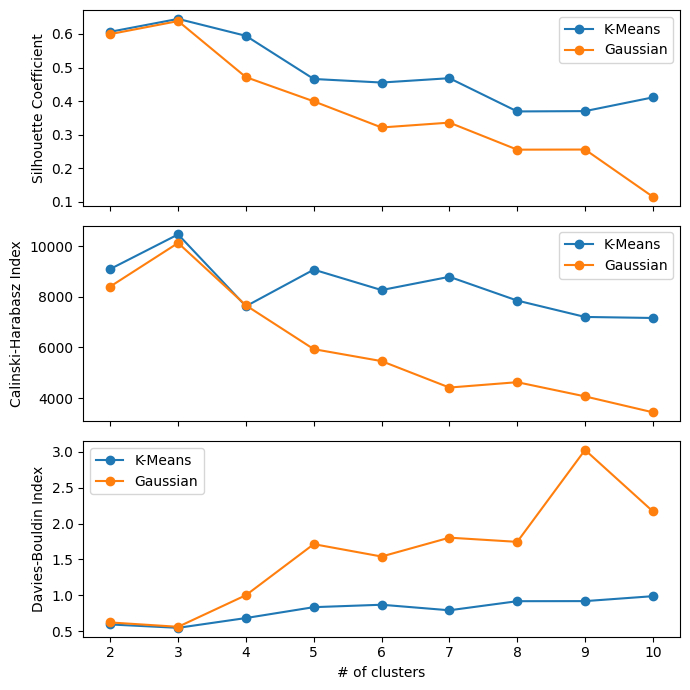

Classic with 5 components has a stress value of 0.115448


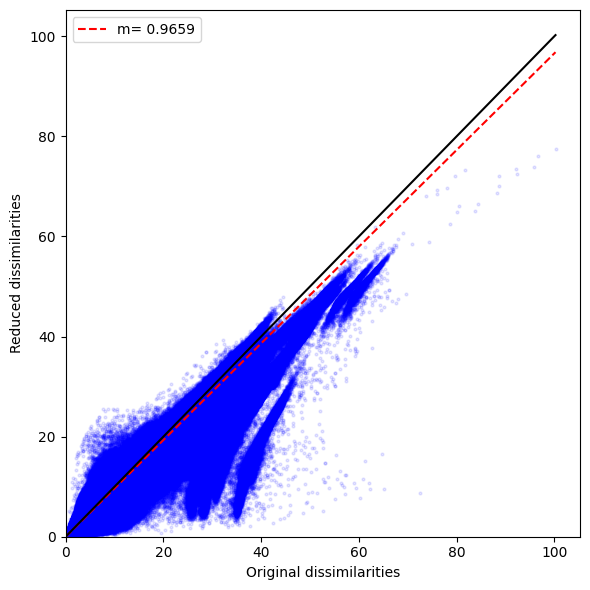

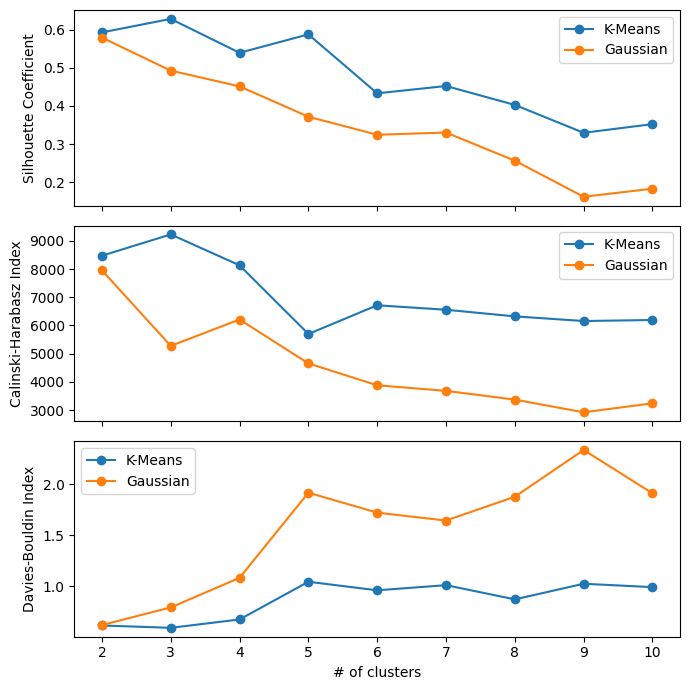

Classic with 6 components has a stress value of 0.106368


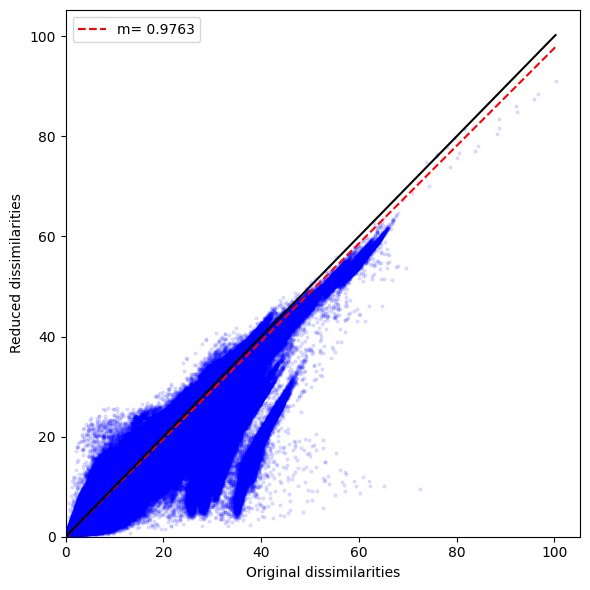

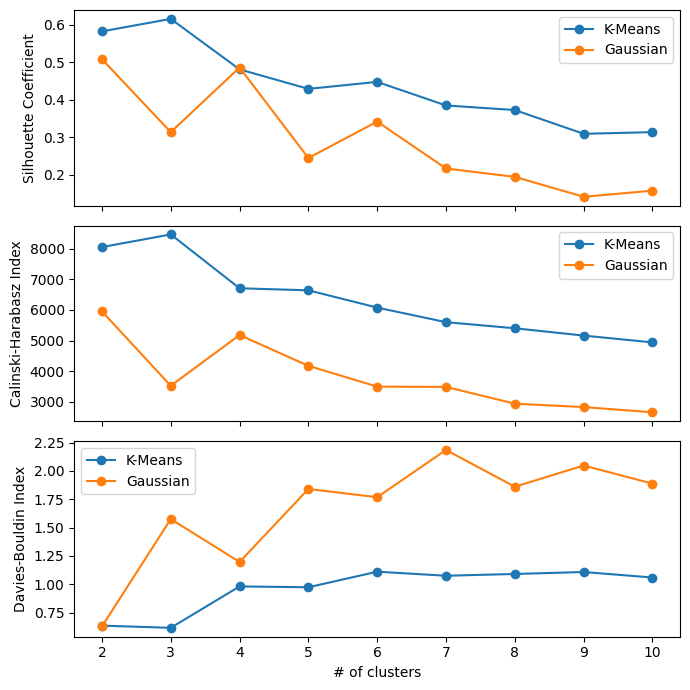

In [6]:
stress_array_MDS_Classic = []

for num_dim in list_dimensions:
    stress = TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dim, method = "Classic")
    stress_array_MDS_Classic.append(stress)

    metrics_by_method = dict()
    for type_cluster in list_clust_methods:
        metrics = []
        for num_cluster in list_clusters:
            cluster_metrics = GetClusteringMetrics(TEC_ClusterSeries.Xc_TS, num_cluster, type_cluster)

            metrics.append((num_cluster, cluster_metrics))
        metrics_by_method[type_cluster] = metrics

    VisualizeClusterMetrics(metrics_by_method)

### SMACOF metrico

SMACOF-metric with 1 components has a stress value of 0.485033


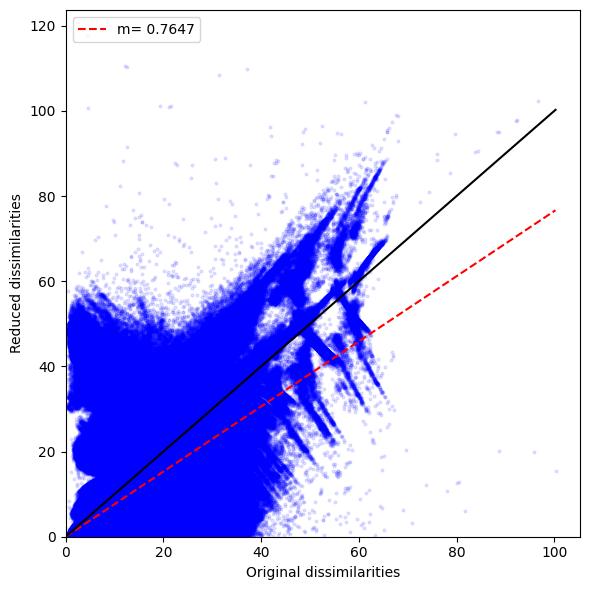

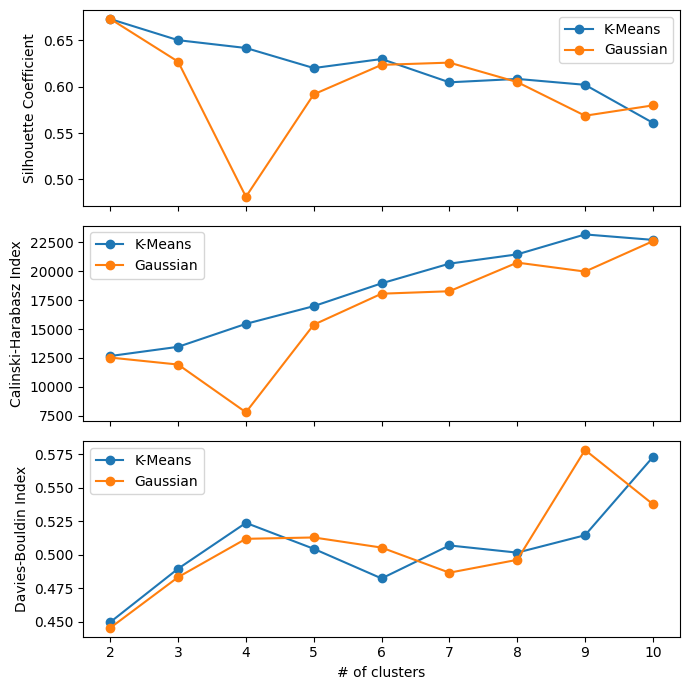

SMACOF-metric with 2 components has a stress value of 0.134681


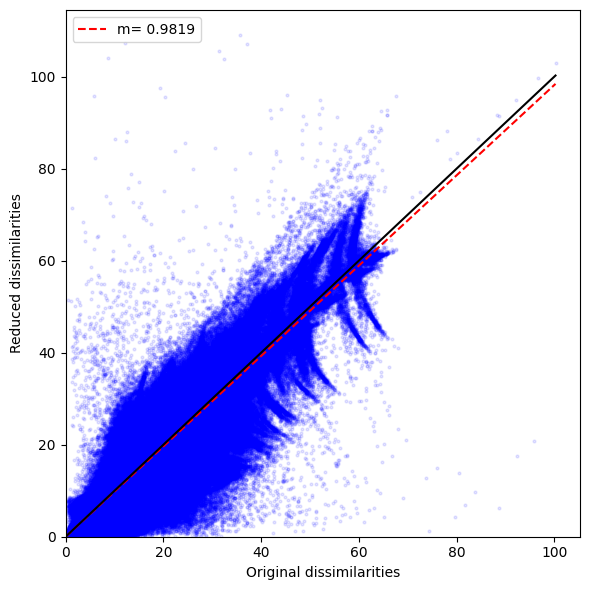

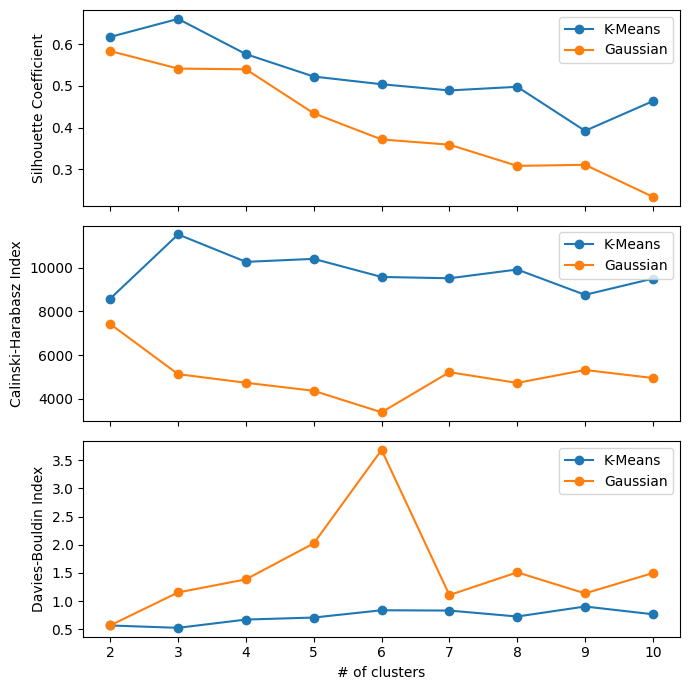

SMACOF-metric with 3 components has a stress value of 0.082151


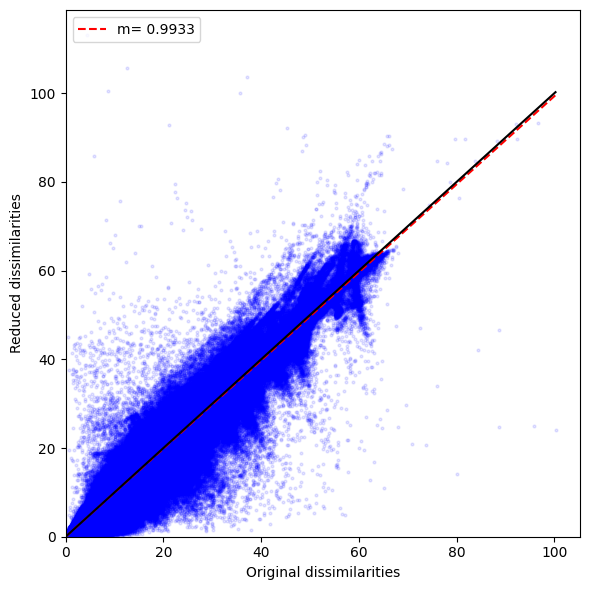

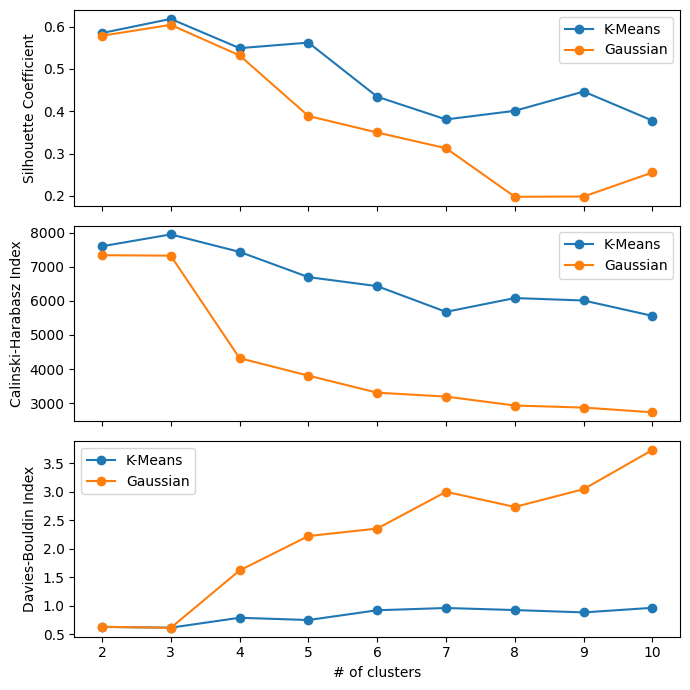

SMACOF-metric with 4 components has a stress value of 0.063357


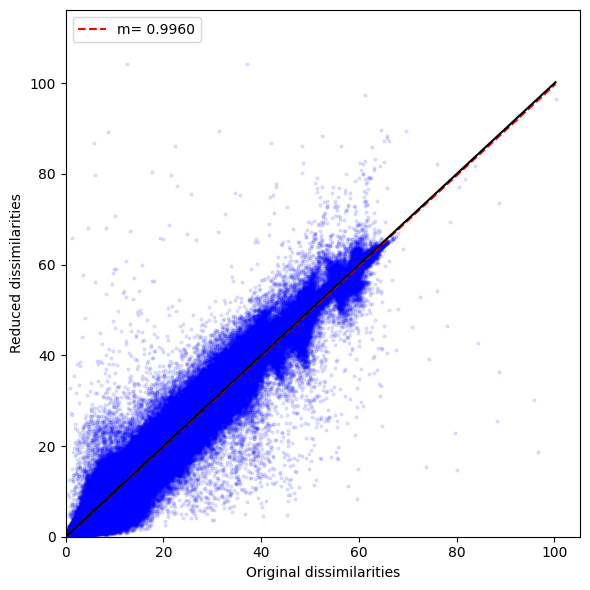

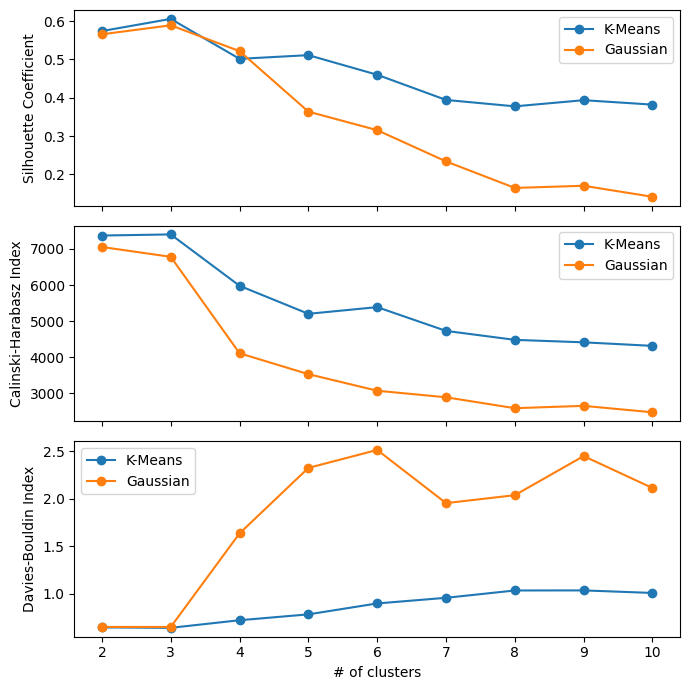

SMACOF-metric with 5 components has a stress value of 0.053150


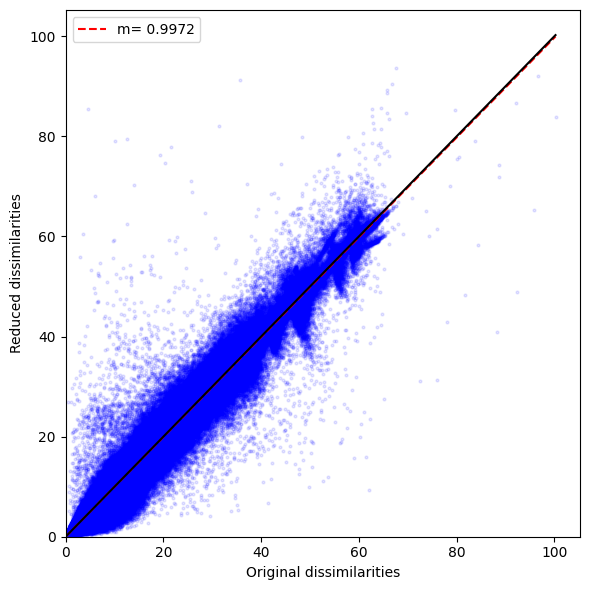

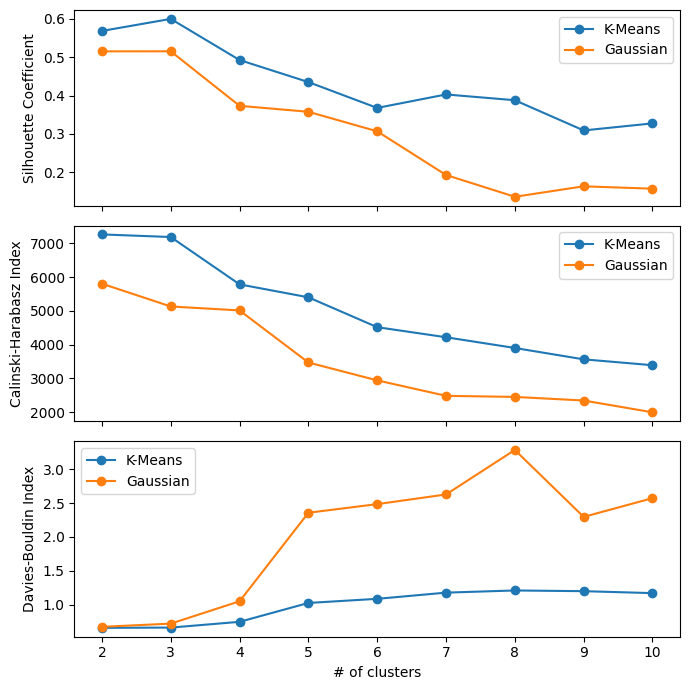

SMACOF-metric with 6 components has a stress value of 0.047949


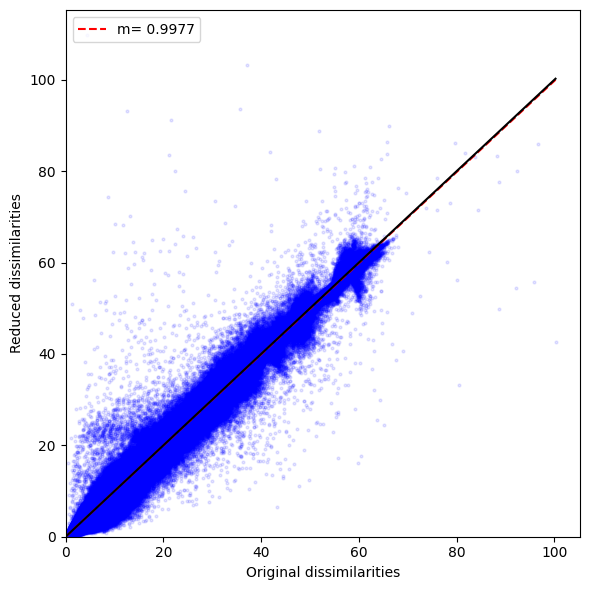

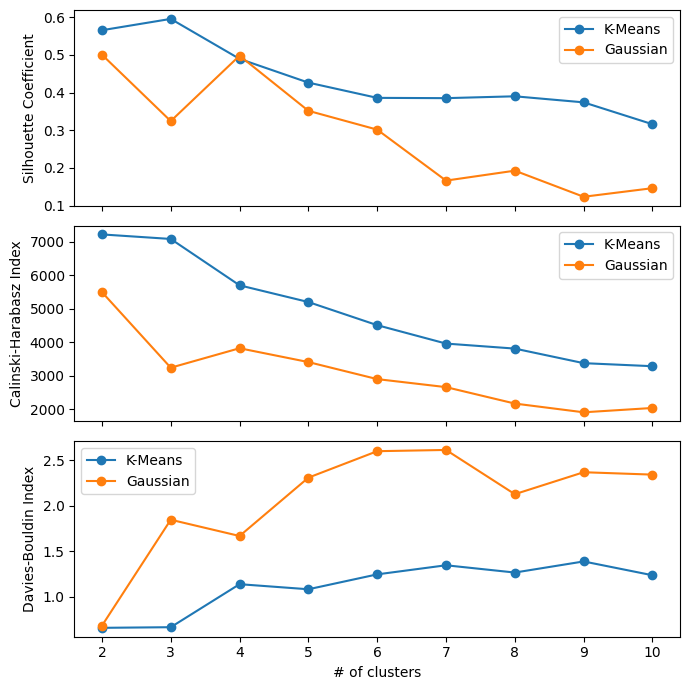

In [7]:
stress_array_SMACOF_metric = []

for num_dim in list_dimensions:
    stress = TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dim, method = "SMACOF-metric")
    stress_array_SMACOF_metric.append(stress)

    metrics_by_method = dict()
    for type_cluster in list_clust_methods:
        metrics = []
        for num_cluster in list_clusters:
            cluster_metrics = GetClusteringMetrics(TEC_ClusterSeries.Xc_TS, num_cluster, type_cluster)

            metrics.append((num_cluster, cluster_metrics))
        metrics_by_method[type_cluster] = metrics

    VisualizeClusterMetrics(metrics_by_method)



### SMACOF DTW

SMACOF-Dissim with 1 components has a stress value of 0.514635


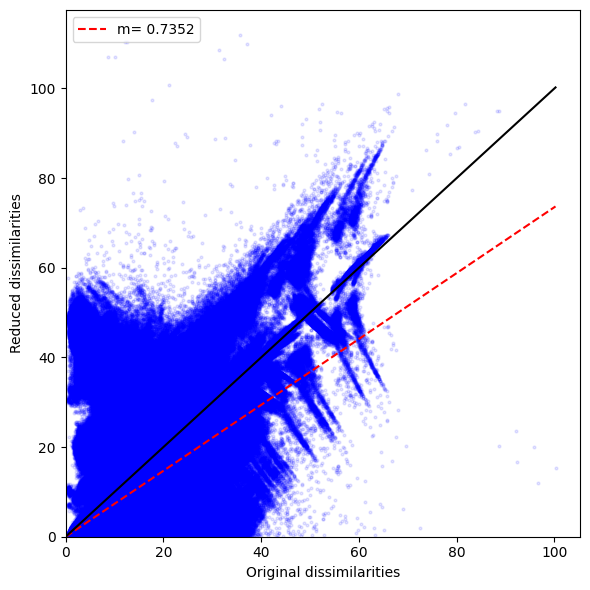

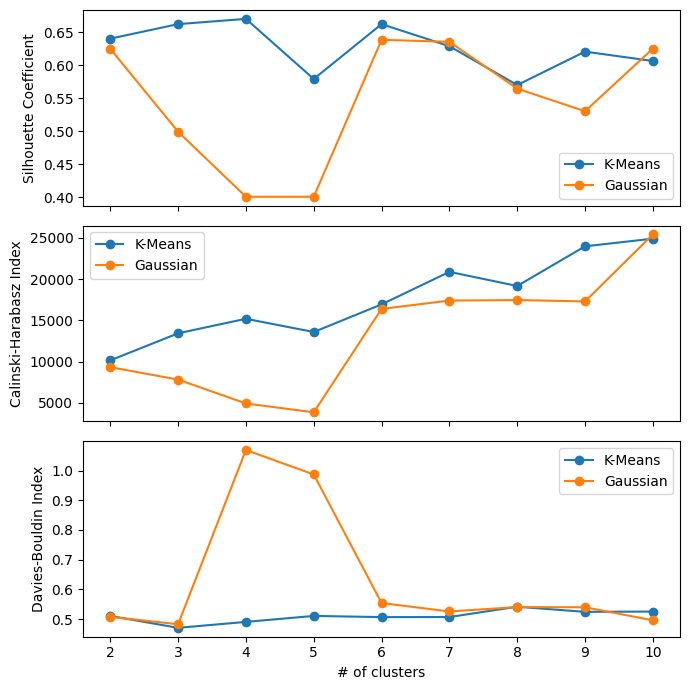

SMACOF-Dissim with 2 components has a stress value of 0.135000


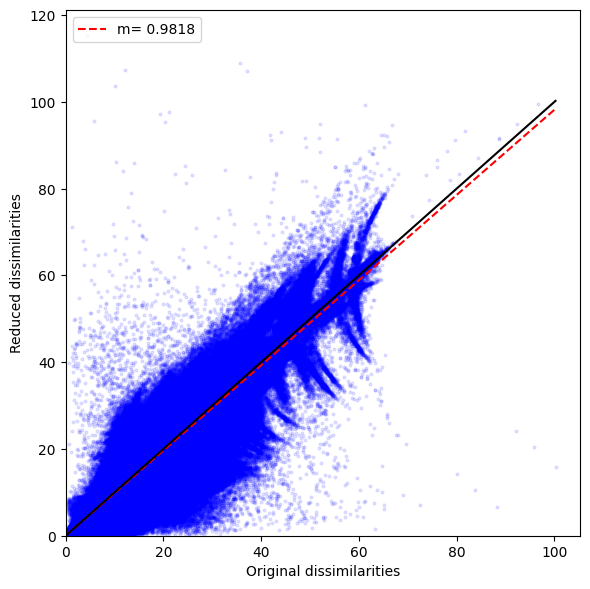

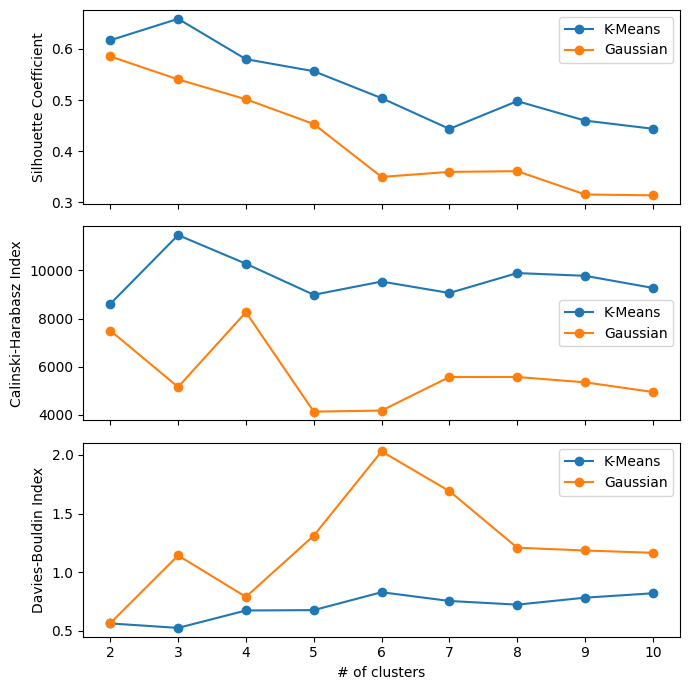

SMACOF-Dissim with 3 components has a stress value of 0.081594


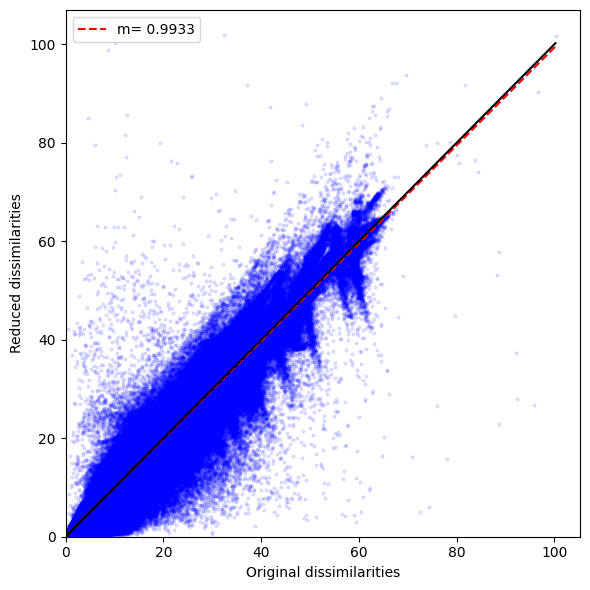

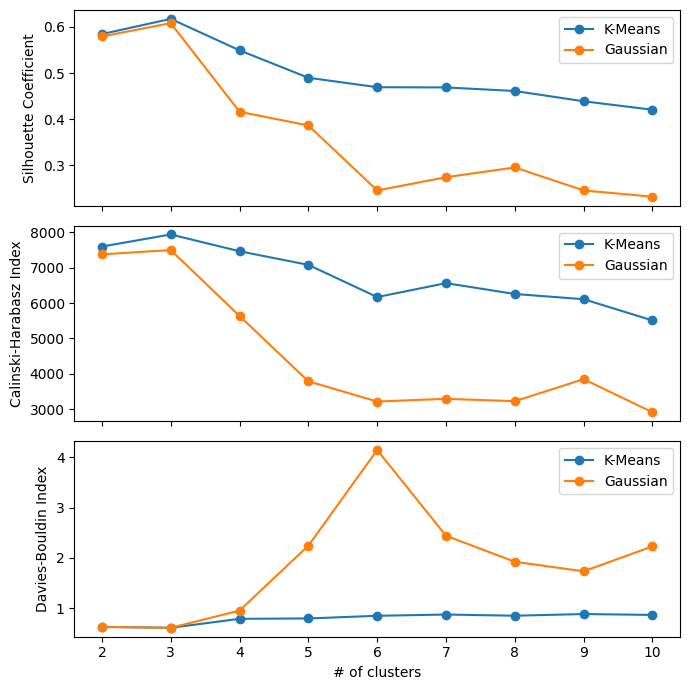

SMACOF-Dissim with 4 components has a stress value of 0.062699


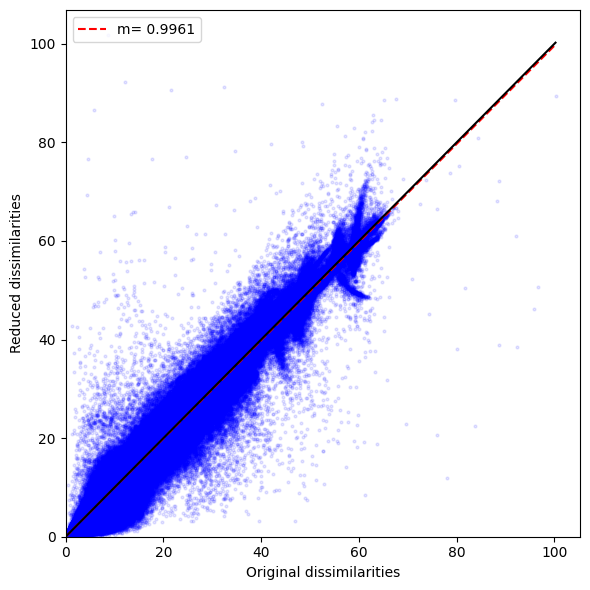

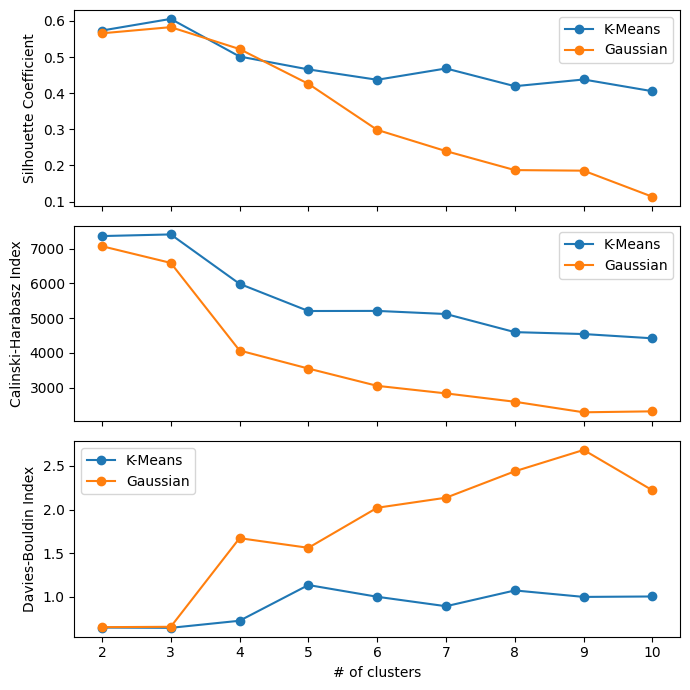

SMACOF-Dissim with 5 components has a stress value of 0.053466


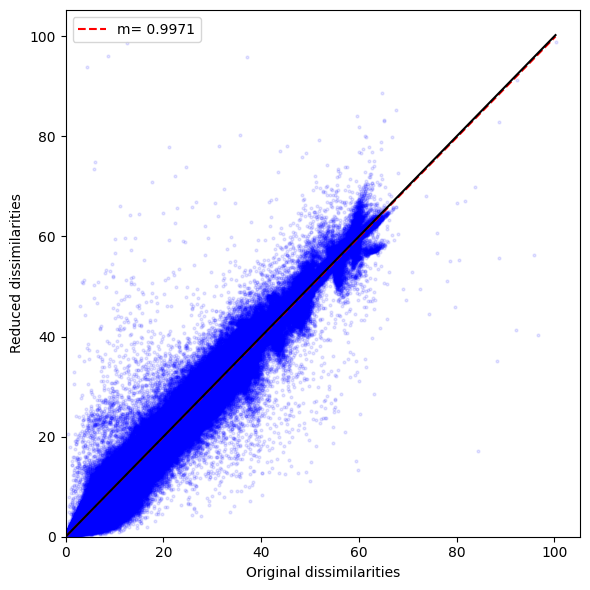

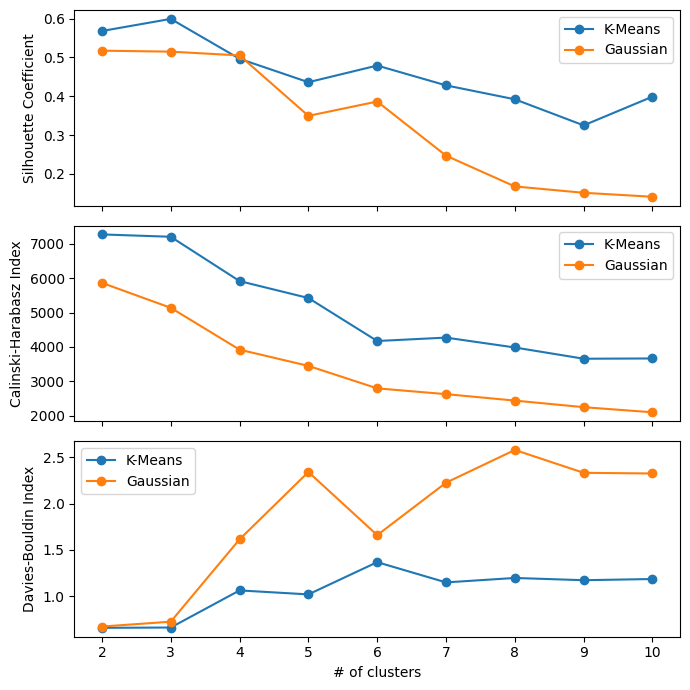

SMACOF-Dissim with 6 components has a stress value of 0.047904


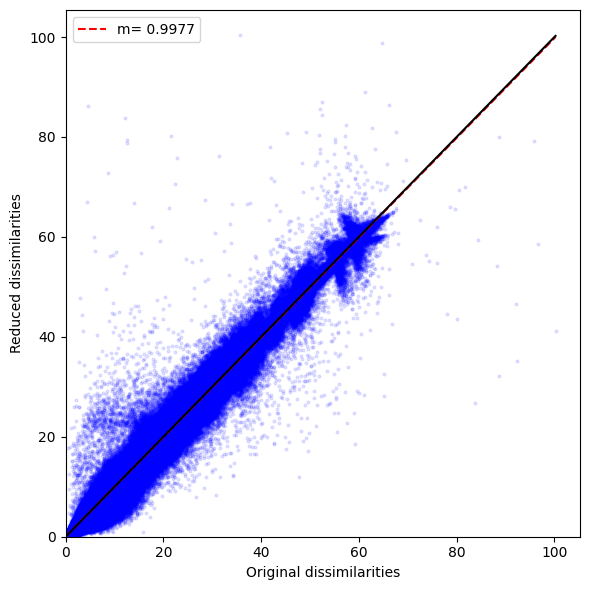

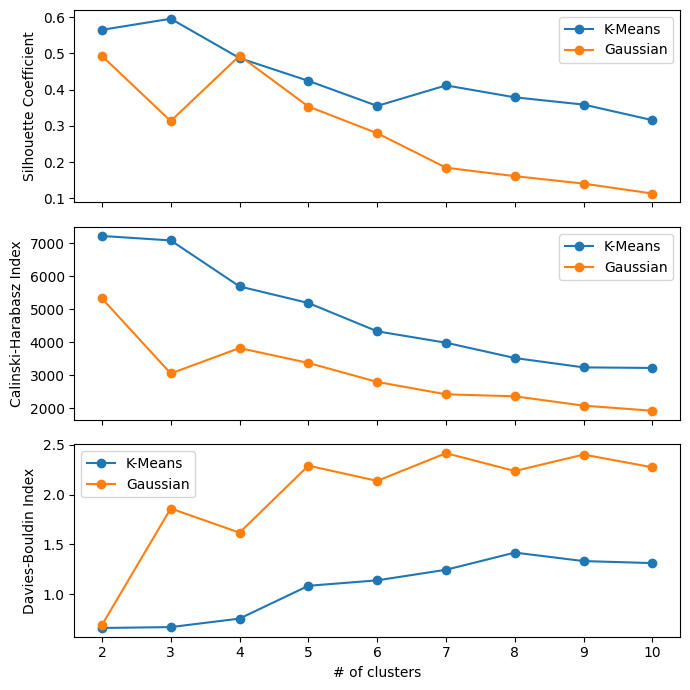

In [8]:
stress_array_SMACOF_DTW = []

for num_dim in list_dimensions:
    stress = TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dim, method = "SMACOF-Dissim")
    stress_array_SMACOF_DTW.append(stress)

    metrics_by_method = dict()
    for type_cluster in list_clust_methods:
        metrics = []
        for num_cluster in list_clusters:
            cluster_metrics = GetClusteringMetrics(TEC_ClusterSeries.Xc_TS, num_cluster, type_cluster)

            metrics.append((num_cluster, cluster_metrics))
        metrics_by_method[type_cluster] = metrics

    VisualizeClusterMetrics(metrics_by_method)

### SMACOF con solución clásica inicial

SMACOF-Classic with 1 components has a stress value of 0.247014


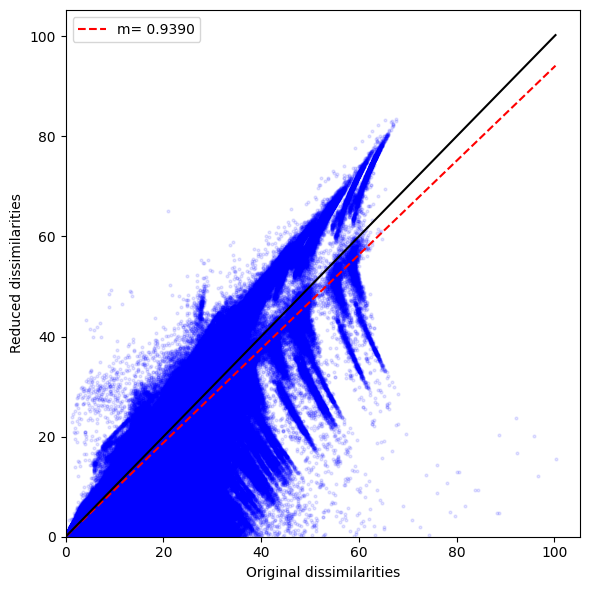

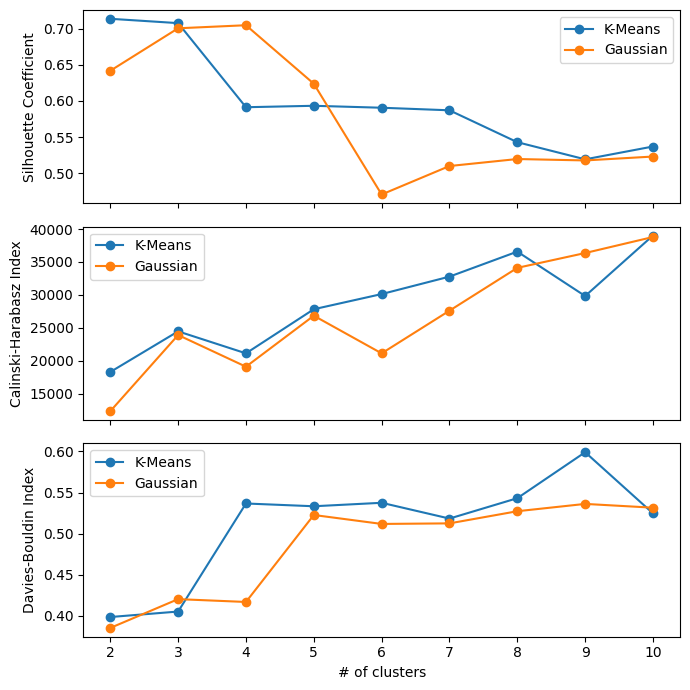

SMACOF-Classic with 2 components has a stress value of 0.127526


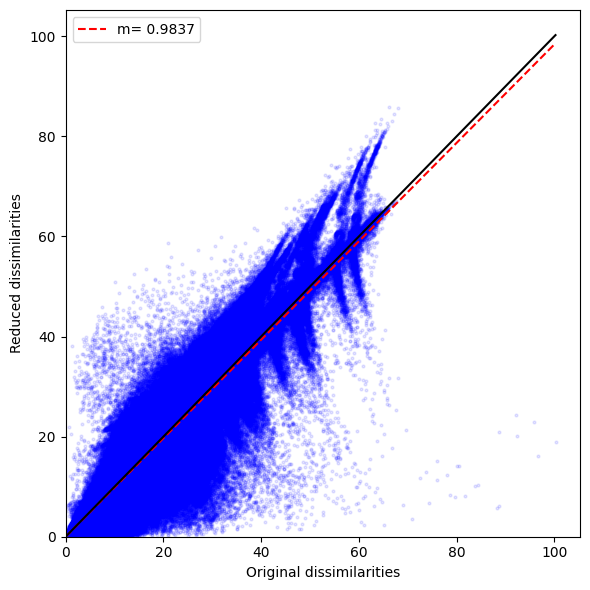

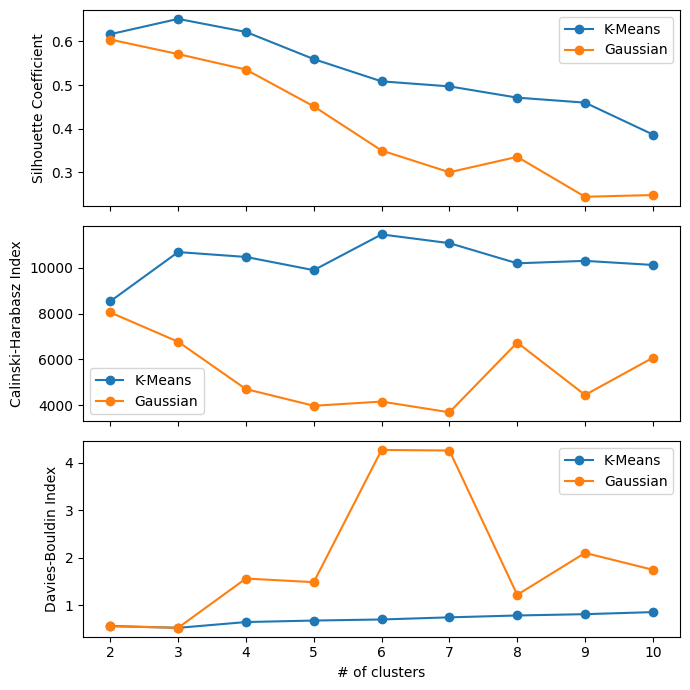

SMACOF-Classic with 3 components has a stress value of 0.077002


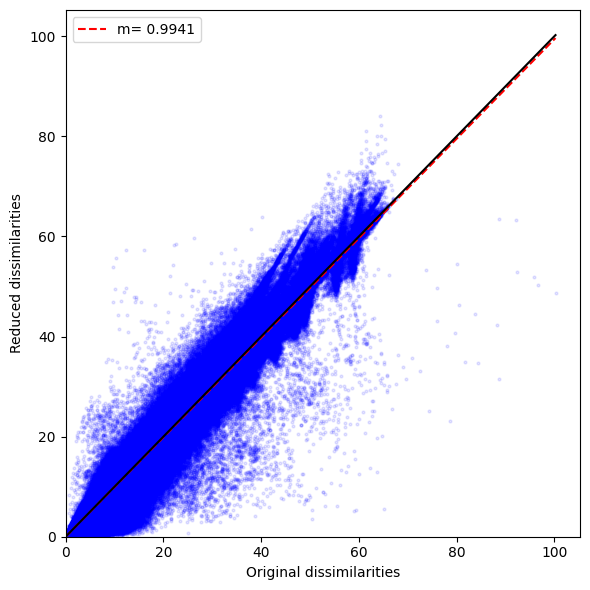

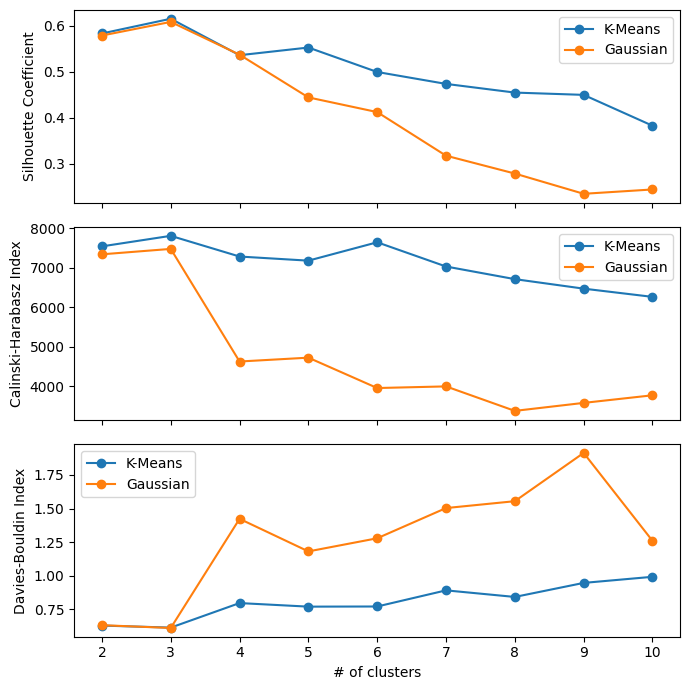

SMACOF-Classic with 4 components has a stress value of 0.058696


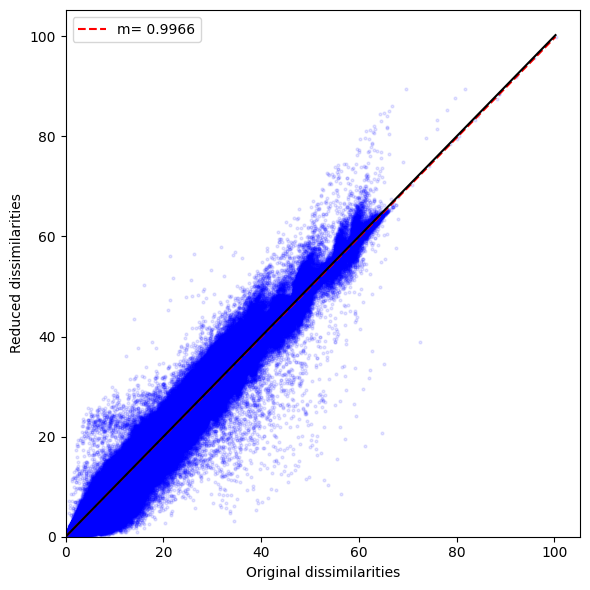

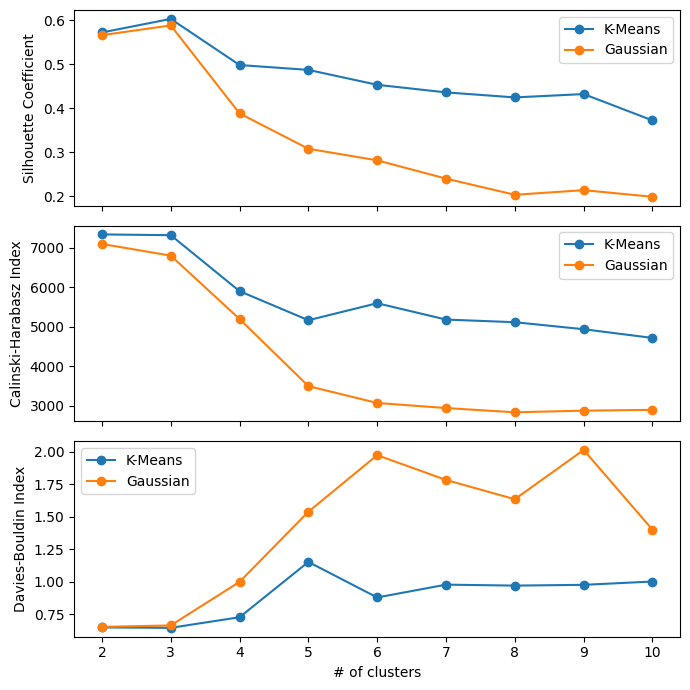

SMACOF-Classic with 5 components has a stress value of 0.049431


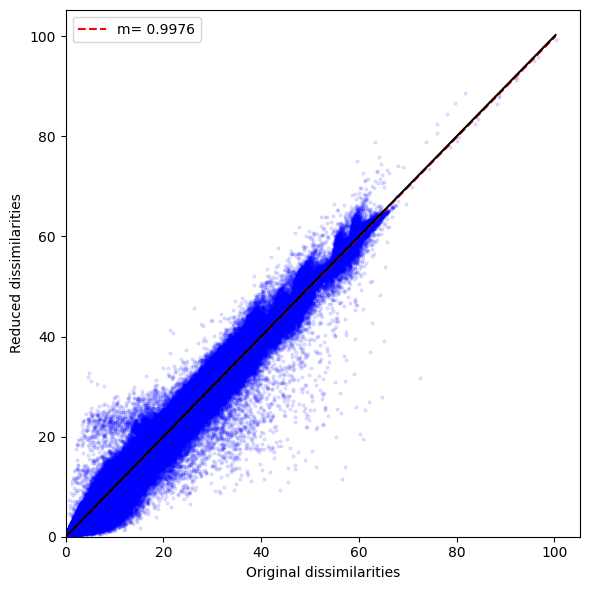

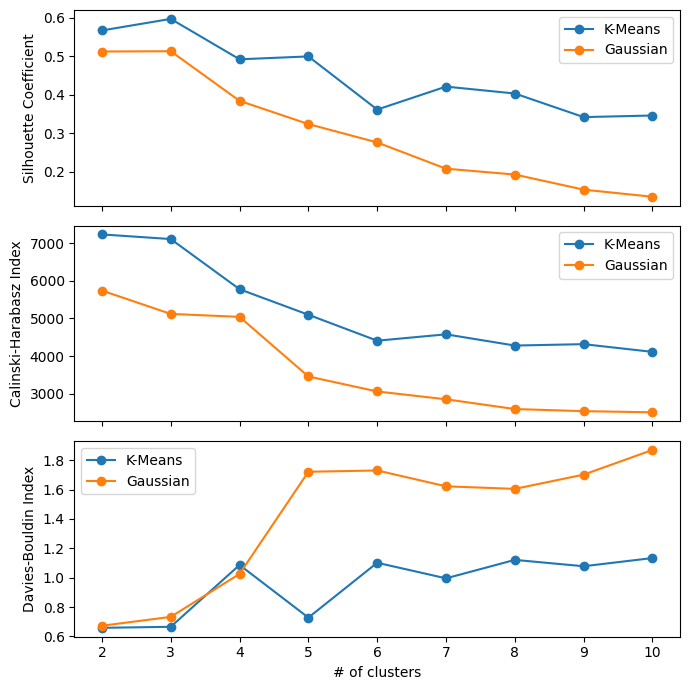

SMACOF-Classic with 6 components has a stress value of 0.043942


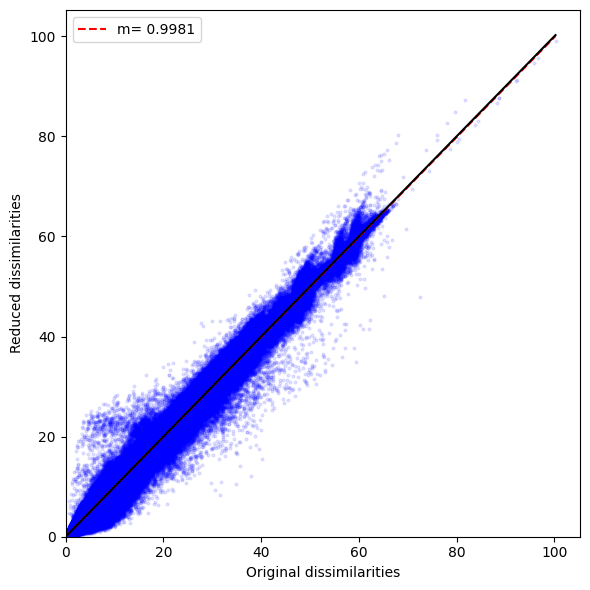

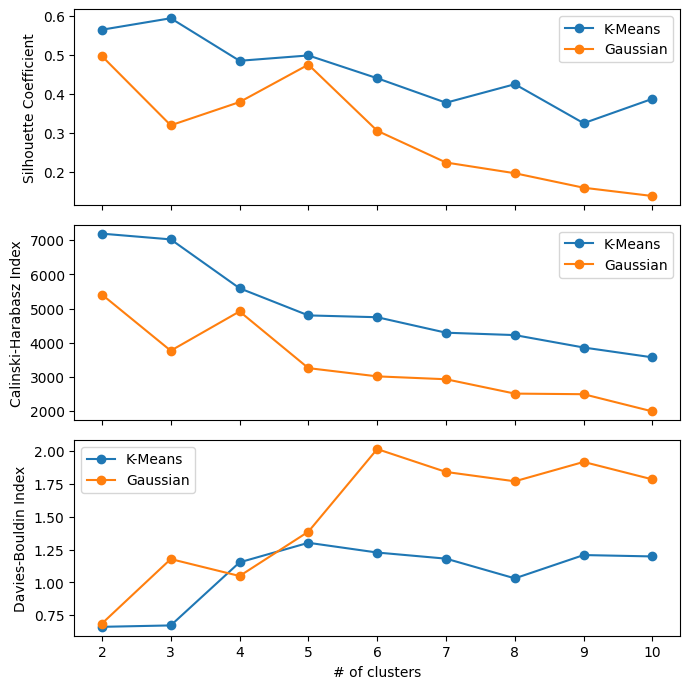

In [9]:
stress_array_SMACOF_Classic = []

for num_dim in list_dimensions:
    stress = TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dim, method = "SMACOF-Classic")
    stress_array_SMACOF_Classic.append(stress)

    metrics_by_method = dict()
    for type_cluster in list_clust_methods:
        metrics = []
        for num_cluster in list_clusters:
            cluster_metrics = GetClusteringMetrics(TEC_ClusterSeries.Xc_TS, num_cluster, type_cluster)

            metrics.append((num_cluster, cluster_metrics))
        metrics_by_method[type_cluster] = metrics

    VisualizeClusterMetrics(metrics_by_method)

### SMACOF DTW con solución clásica inicial

[[ 0.         11.05120434 14.82403979 ...  5.63173777  3.14625381
   2.73449743]
 [11.05120434  0.         10.52898469 ...  9.52144137 10.10253667
   9.86057118]
 [14.82403979 10.52898469  0.         ... 13.09066502 13.69729927
  14.87856322]
 ...
 [ 5.63173777  9.52144137 13.09066502 ...  0.          5.11240723
   4.07291795]
 [ 3.14625381 10.10253667 13.69729927 ...  5.11240723  0.
   1.97328471]
 [ 2.73449743  9.86057118 14.87856322 ...  4.07291795  1.97328471
   0.        ]]
SMACOF-Dissim-Classic with 1 components has a stress value of 0.247014


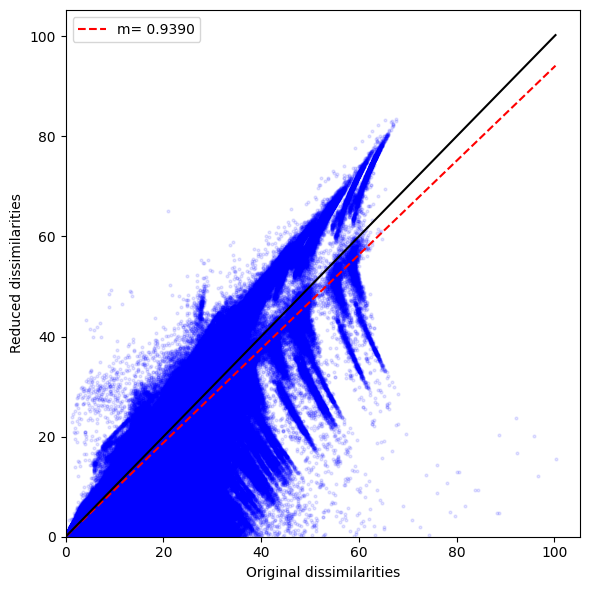

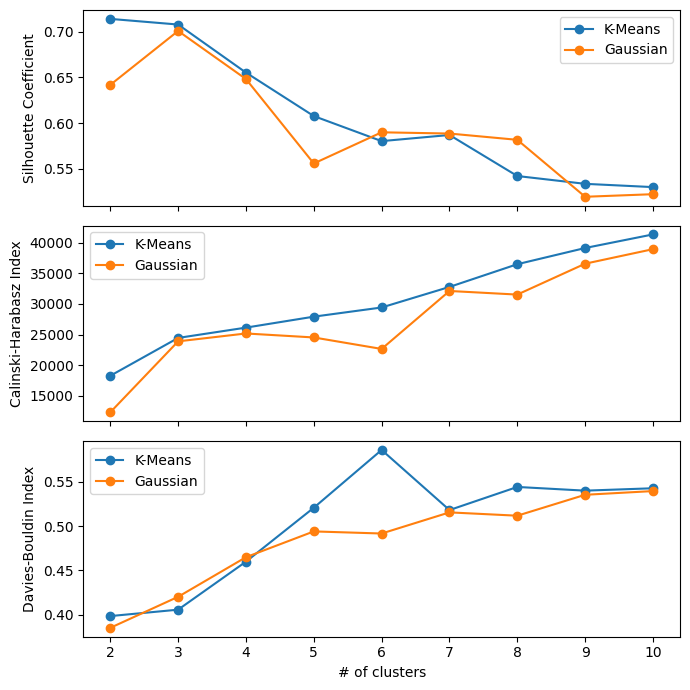

[[ 0.         11.05120434 14.82403979 ...  5.63173777  3.14625381
   2.73449743]
 [11.05120434  0.         10.52898469 ...  9.52144137 10.10253667
   9.86057118]
 [14.82403979 10.52898469  0.         ... 13.09066502 13.69729927
  14.87856322]
 ...
 [ 5.63173777  9.52144137 13.09066502 ...  0.          5.11240723
   4.07291795]
 [ 3.14625381 10.10253667 13.69729927 ...  5.11240723  0.
   1.97328471]
 [ 2.73449743  9.86057118 14.87856322 ...  4.07291795  1.97328471
   0.        ]]
SMACOF-Dissim-Classic with 2 components has a stress value of 0.127526


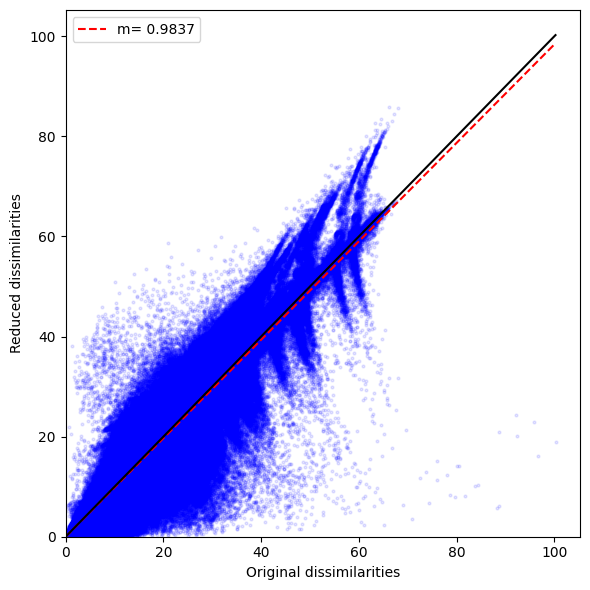

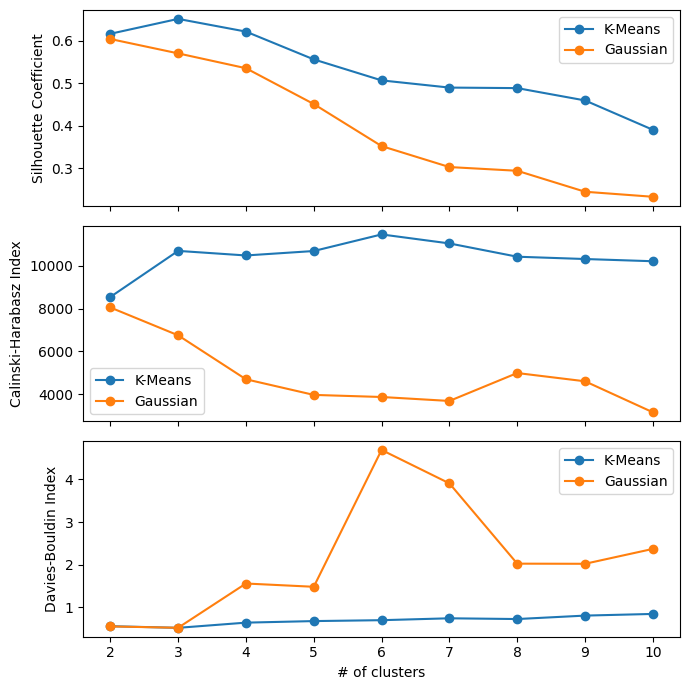

[[ 0.         11.05120434 14.82403979 ...  5.63173777  3.14625381
   2.73449743]
 [11.05120434  0.         10.52898469 ...  9.52144137 10.10253667
   9.86057118]
 [14.82403979 10.52898469  0.         ... 13.09066502 13.69729927
  14.87856322]
 ...
 [ 5.63173777  9.52144137 13.09066502 ...  0.          5.11240723
   4.07291795]
 [ 3.14625381 10.10253667 13.69729927 ...  5.11240723  0.
   1.97328471]
 [ 2.73449743  9.86057118 14.87856322 ...  4.07291795  1.97328471
   0.        ]]
SMACOF-Dissim-Classic with 3 components has a stress value of 0.077002


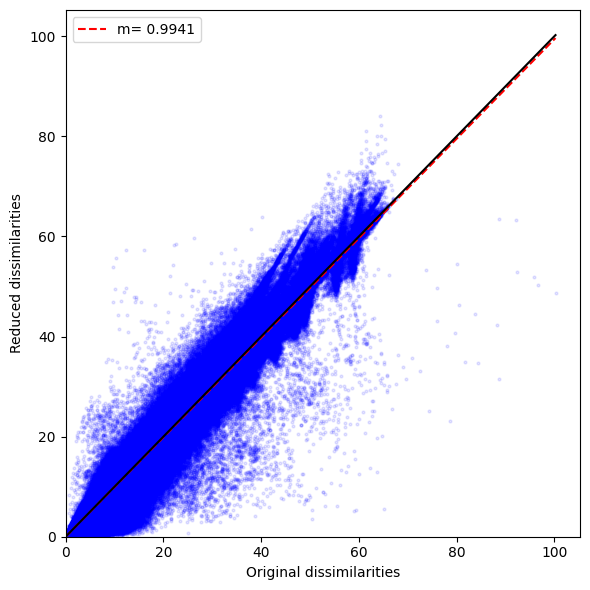

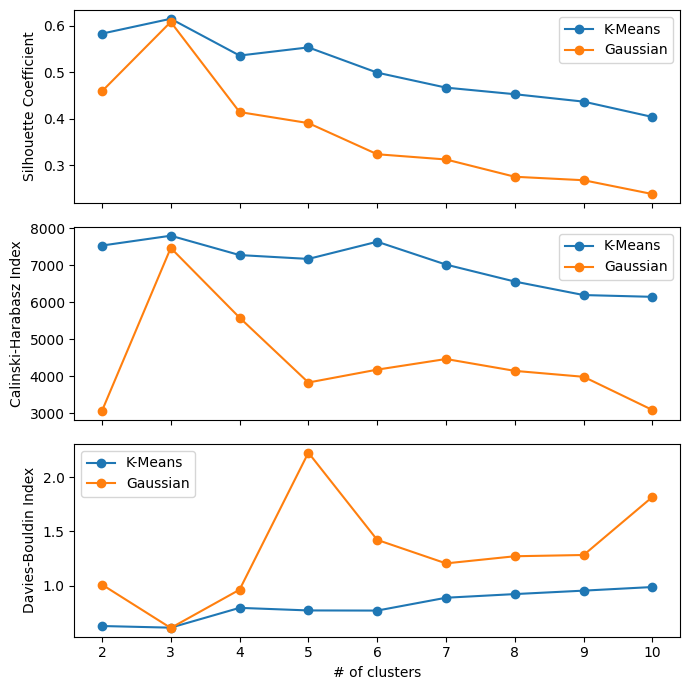

[[ 0.         11.05120434 14.82403979 ...  5.63173777  3.14625381
   2.73449743]
 [11.05120434  0.         10.52898469 ...  9.52144137 10.10253667
   9.86057118]
 [14.82403979 10.52898469  0.         ... 13.09066502 13.69729927
  14.87856322]
 ...
 [ 5.63173777  9.52144137 13.09066502 ...  0.          5.11240723
   4.07291795]
 [ 3.14625381 10.10253667 13.69729927 ...  5.11240723  0.
   1.97328471]
 [ 2.73449743  9.86057118 14.87856322 ...  4.07291795  1.97328471
   0.        ]]
SMACOF-Dissim-Classic with 4 components has a stress value of 0.058696


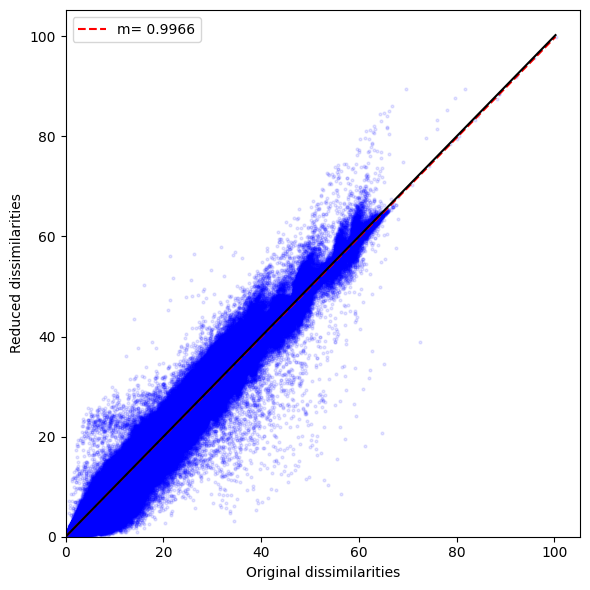

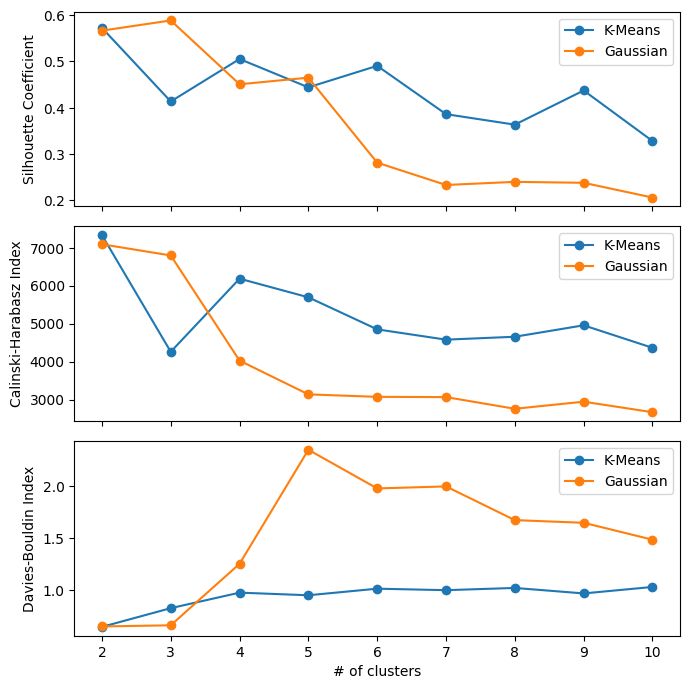

[[ 0.         11.05120434 14.82403979 ...  5.63173777  3.14625381
   2.73449743]
 [11.05120434  0.         10.52898469 ...  9.52144137 10.10253667
   9.86057118]
 [14.82403979 10.52898469  0.         ... 13.09066502 13.69729927
  14.87856322]
 ...
 [ 5.63173777  9.52144137 13.09066502 ...  0.          5.11240723
   4.07291795]
 [ 3.14625381 10.10253667 13.69729927 ...  5.11240723  0.
   1.97328471]
 [ 2.73449743  9.86057118 14.87856322 ...  4.07291795  1.97328471
   0.        ]]
SMACOF-Dissim-Classic with 5 components has a stress value of 0.049431


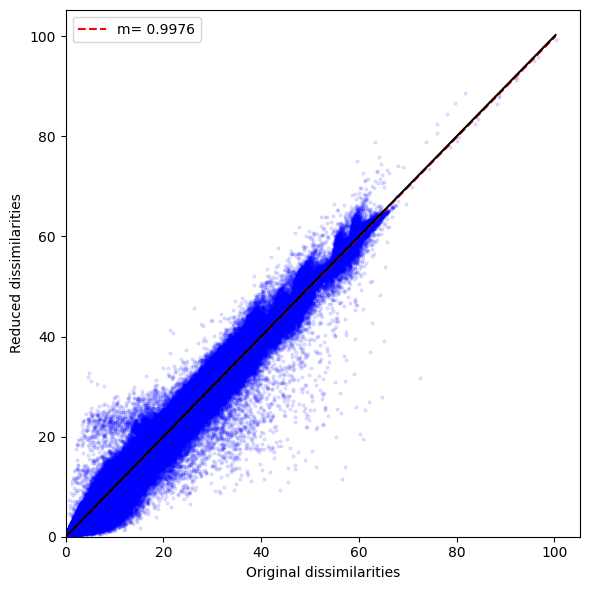

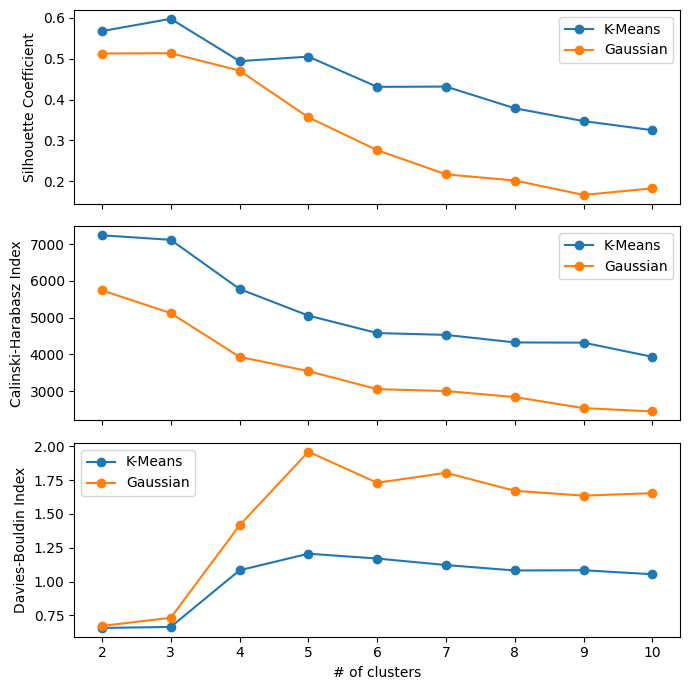

[[ 0.         11.05120434 14.82403979 ...  5.63173777  3.14625381
   2.73449743]
 [11.05120434  0.         10.52898469 ...  9.52144137 10.10253667
   9.86057118]
 [14.82403979 10.52898469  0.         ... 13.09066502 13.69729927
  14.87856322]
 ...
 [ 5.63173777  9.52144137 13.09066502 ...  0.          5.11240723
   4.07291795]
 [ 3.14625381 10.10253667 13.69729927 ...  5.11240723  0.
   1.97328471]
 [ 2.73449743  9.86057118 14.87856322 ...  4.07291795  1.97328471
   0.        ]]
SMACOF-Dissim-Classic with 6 components has a stress value of 0.043942


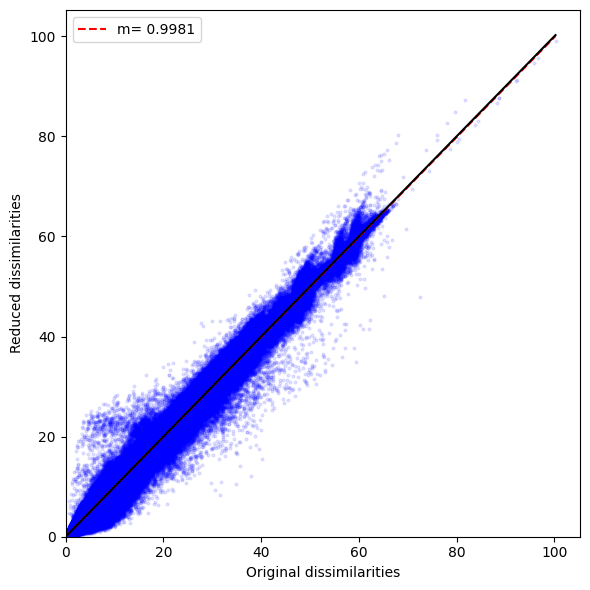

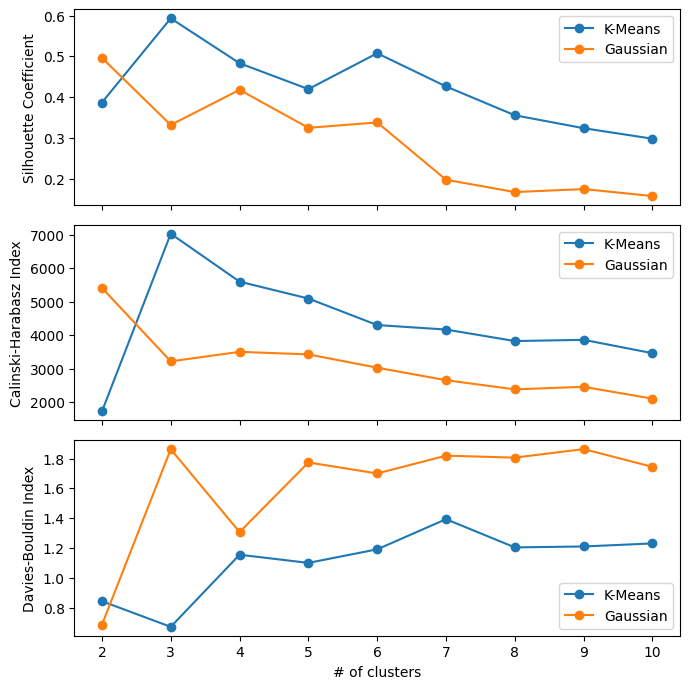

In [10]:
stress_array_SMACOF_DTW_Classic = []

for num_dim in list_dimensions:
    stress = TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dim, method = "SMACOF-Dissim-Classic")
    stress_array_SMACOF_DTW_Classic.append(stress)

    metrics_by_method = dict()
    for type_cluster in list_clust_methods:
        metrics = []
        for num_cluster in list_clusters:
            cluster_metrics = GetClusteringMetrics(TEC_ClusterSeries.Xc_TS, num_cluster, type_cluster)

            metrics.append((num_cluster, cluster_metrics))
        metrics_by_method[type_cluster] = metrics

    VisualizeClusterMetrics(metrics_by_method)

## Curvas Stress-1

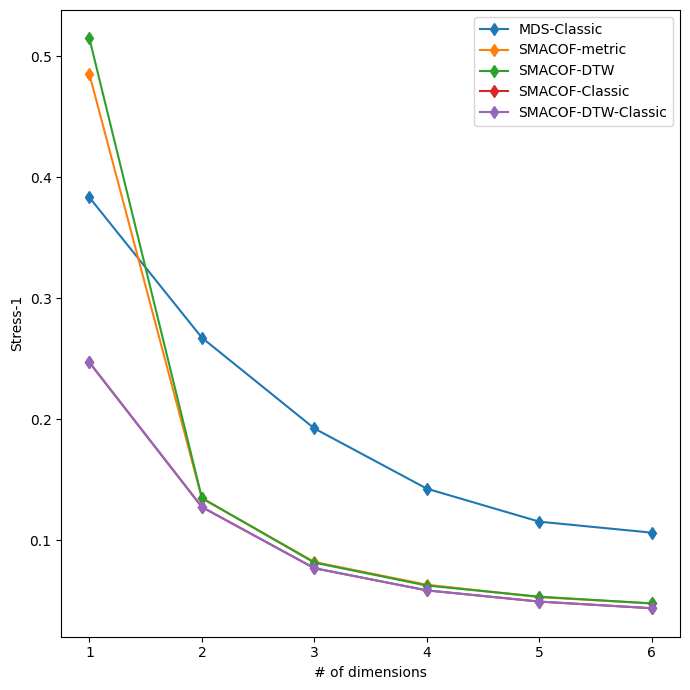

In [11]:
Figure, Subplot = subplots(1, 1, figsize = (7, 7))

Subplot.plot(list_dimensions, stress_array_MDS_Classic, "-d", label =  "MDS-Classic")
Subplot.plot(list_dimensions, stress_array_SMACOF_metric, "-d", label =  "SMACOF-metric")
Subplot.plot(list_dimensions, stress_array_SMACOF_DTW, "-d", label =  "SMACOF-DTW")
Subplot.plot(list_dimensions, stress_array_SMACOF_Classic, "-d", label =  "SMACOF-Classic")
Subplot.plot(list_dimensions, stress_array_SMACOF_DTW_Classic, "-d", label =  "SMACOF-DTW-Classic")
Subplot.set_xlabel("# of dimensions")
Subplot.set_ylabel("Stress-1")
Subplot.legend()

Figure.tight_layout()

show()